# Introduction

The `hep_tables` package is for prototyping a hierarchical access language in python. It has elements of `numpy`'s slicing syntax and elements of LINQ from C# in it. And whatever else seems to work. Be warned that lots of stuff is hardwired - especially the surrounding code, the backend, etc.

This requires that you have a `servicex` instance running as a datasource on local ports 5000 and 9000.

In [1]:
import sys
sys.path = ['..'] + sys.path
from hep_tables import xaod_table,make_local
from func_adl import EventDataset
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.NOTSET)
logging.getLogger("urllib3").setLevel(logging.WARNING)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

Everything has to start from a dataset.

In [2]:
dataset = EventDataset('localds://mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00')

And we need to frame this as a hierarchical `DataFrame`. This implies some knowledge of how to translate it into columns, so here we need indicate that this is a dataset with ATLAS `xAOD` files in it.

In [3]:
df = xaod_table(dataset)

# Simple `numpy` syntax

First, lets just get all the $p_T$'s of jets from a data sample.

In [4]:
%%time
pts = df.Electrons("Electrons").pt

Wall time: 0 ns


We just have the DAG for generating the pt's of all jets. Next we need to actually run the thing

In [5]:
%%time
np_pts = make_local(pts)

INFO:hep_tables.utils:make_local expression: Attribute(value=Call(func=Attribute(value=ast_DataFrame(), attr='Electrons', ctx=Load()), args=[Str(s='Electrons')], keywords=[]), attr='pt', ctx=Load())
INFO:hep_tables.utils:make_local filter: None


Wall time: 1min 51s


In [6]:
np_pts

{b'col1': <JaggedArray [[5794.58154296875] [36922.66796875 4514.7587890625 4671.44482421875 3811.003662109375] [] ... [71117.4375 41262.8671875] [2963.131103515625] [18347.8984375]] at 0x023e1361fdc8>}

i:\gwatts\code\irishep\hep_tables\.venv\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
i:\gwatts\code\irishep\hep_tables\.venv\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee')

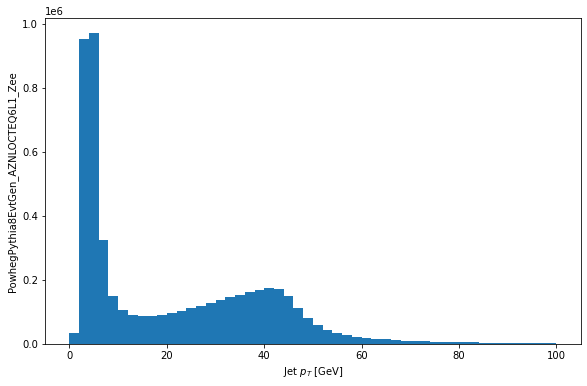

In [7]:
s = 6
plt.figure(figsize=(s*1.6,s))
plt.hist(np_pts[b'col1'].flatten()/1000.0, range=(0, 100), bins=50)
plt.xlabel('Jet $p_T$ [GeV]')
plt.ylabel('PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee')